<img src="../logo_UTN.svg" align="right" width="150" /> 

# Teoría De Circuitos 2

# Trabajo Semanal Nº3
#### Federico Borello

### Consigna

Dada la siguiente red circuital:

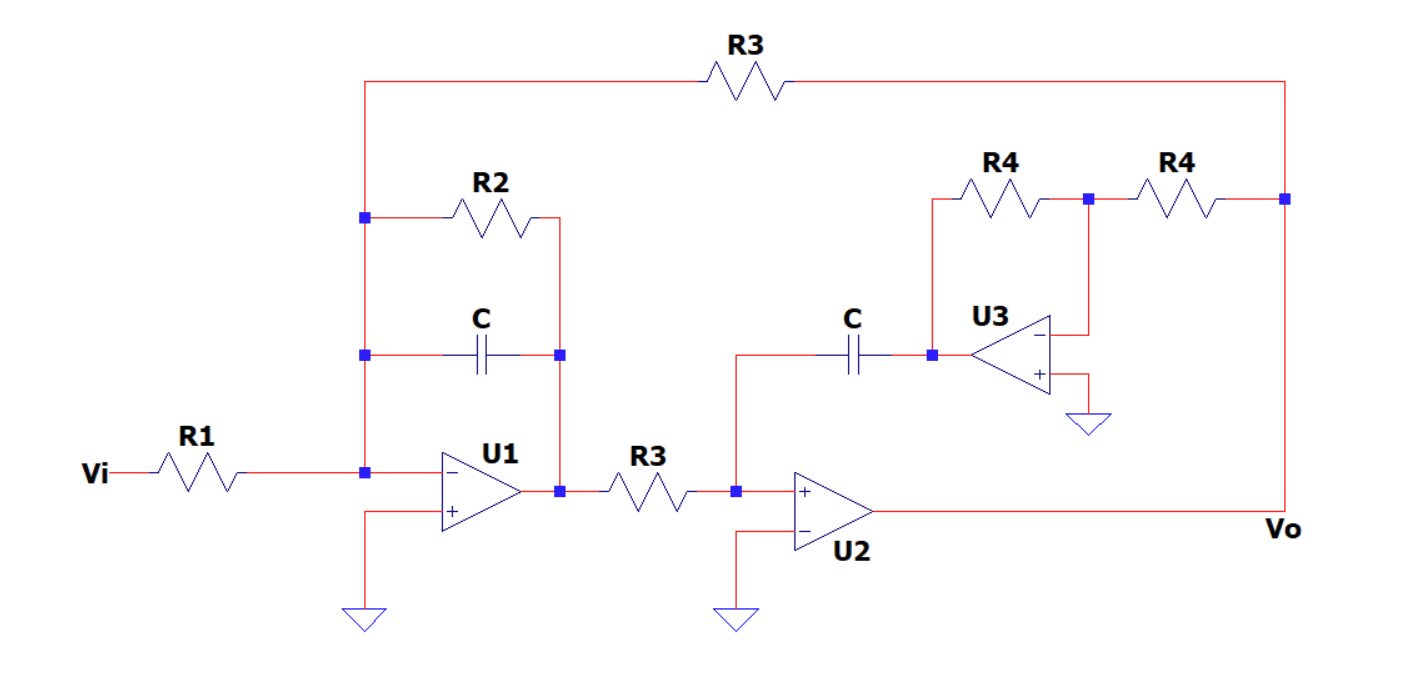


👉 01. Obtenga la función transferencia $H(s)=\frac{V_o}{V_i}$ a partir de método sistemático de nodos e identifique $k$ (ganancia de la red), $\omega_0$ (pulsación angular de resonancia) y $Q$ (factor de selectividad).

👉 02. Realice el estudio correspondiente a la respuesta en frecuencia (módulo y fase), en aquellos puntos que considere característicos (mínimamente en los extremos de banda y en $\omega_0$), y al diagrama de polos y ceros.

👉 03. Identifique el tipo de filtro y describa su comportamiento en función de los resultados obtenidos en el punto anterior: ganancia en banda de paso, roll-off y su relación con las singularidades, tipo de función y desenvolvimiento de fase total, retardo de grupo y su relación con la fase y cualquier otro aspecto que le parezca relevante mencionar.

👉 04. Normalice la red circuital en impedancia y pulsación. Indique los valores de la red en función de los parámetros de la función transferencia $H(s)$: $k$, $\omega_0$ y $Q$.

👉 05. Realice el estudio de sensibilidad analíticamente de $S^{\omega_0}_C$, $S^{R_2}_Q$ y $S^{R_3}_Q$ y verifique alguna de ellas a partir del método gráfico en LTSpice.

**Bonus:**

+10 💎 Obtenga el valor de los componentes para que la red se comporte como un filtro de máxima planicidad, por caso, Butterworth, $\epsilon = 1$, de 2° orden. Recuerde que la función transferencia viene dada por  
$$
T(s)\big|_{\text{Butter2°}} = \frac{1}{s^2 + s \cdot 2\sqrt{2} + 1}
$$

+10 💎 Realice la simulación numérica y simbólica, en Python, y circuital, en LTSpice de la función transferencia normalizada $H(s)$.

+10 💎 Suponga ahora que la norma de frecuencia viene impuesta, por caso, por $C = 1\,\text{nF}$. Desnormalice convenientemente y repita la simulación circuital ahora con la función transferencia $H(s)$ desnormalizada.  
Sugerencia: Parametrice convenientemente las directivas de simulación para que no deban realizarse mayores modificaciones respecto a la simulación de la red normalizada.

+10 🤯 ¿Podría obtener una red circuital pasabanda a partir de esta topología? En caso afirmativo, ¿cómo quedaría diseñado en función de sus parámetros característicos? Repita los puntos 01, 02, 03 y 04.  
Sugerencia: Ver Schaumann, R. - Van Valkenburg, Mac E., *Design of Analog Filters*, Capítulo 4: Second-Order Lowpass and Bandpass Filters. Sección 4.4: Integrators: The Effect of $A(s)$. Example 4.6. Página 159.


In [1]:
from IPython.display import HTML

file = "./TS3_handwritten.pdf"
html = f"""
<div style="text-align:center;">
    <iframe src="{file}" width="900" height="600"></iframe>
</div>
"""
HTML(html)

In [2]:
# SetUp - Import /utils module
import sys
import os

sys.path.append(os.path.abspath(".."))
import utils.plot as uplt

# Import common packages
from IPython.display import display, Markdown
import sympy as sp
import numpy as np

# Analisis del circuito

Se utiliza la transferencia obtenida con el análisis en papel del circuito(Adjunto arriba).

$$
H(s) = - \frac{R_3}{R_1} \;  \cfrac{\frac{1}{{R_3}^2 \, C^2}}{s^2 + s \, \frac{1}{R_2\, C} + \frac{1}{{R_3}^2 \, C^2}}
$$

Por lo tanto se tiene la siguiente expresión simplificada:

$$
H(s) = - k \;  \cfrac{{\omega_0}^2}{s^2 + s \, \frac{\omega_0}{Q} + {\omega_0}^2}
$$

Siendo los parámetros característicos del filtro:
- $k = \frac{R_3}{R_1}$
- $\omega_0 =  \frac{1}{R_3 \, C}$
- $Q =  \frac{R_2}{R_3}$

## Caso de Estudio

Se realiza un análisis del módulo, fase y diagrama de polos y ceros.

In [3]:
R1, R2, R3, C = sp.symbols("R_1 R_2 R_3 C", real=True, positive=True)
w0, Q, k = sp.symbols("\omega_0 Q k", real=True, positive=True)
s = sp.symbols("s")

# Defino la transferencia T(s)
num = w0**2
den = s**2 + s * w0 / Q + w0**2
T = k * (num / den)

T

\omega_0**2*k/(\omega_0**2 + s**2 + \omega_0*s/Q)

## Normalización

$N_{\omega_0} = \omega_0 $
$N_{Z} = R_1 $

Para simplificar, $R_1 = 1$

Quedando con la siguiente transferencia:

$$
H(s) = - R_3 \;  \cfrac{1}{s^2 + s \, \frac{1}{R_2} + 1}
$$

Siendo los parámetros característicos del filtro:
- $k = R_3$

- $\omega_0 =  \frac{1}{k \, C}$

- $Q =  \frac{R_2}{k}$

Si $k = 1$, simplifica cómo "configurar" el filtro con los parámetros numéricos deseados.

## Gráfico de Modulo y Fase

Para graficar de manera sencilla y visualizar de manera cualitativa el comportamiento del filtro, se utilizan resistores de valor unitario.

Para settear $\omega_0$, se utiliza $C(\omega_0)$ y se impone una frecuencia de $10 kHz$. Como $R_3 == R_1$, $k = 1$. $Q = 1$ ya que los resistencias son de $1$.

> Por el gráfico, se observa que el circuito se comporta como un **pasabajos**.


### Transferencia

$$H(s) = - \frac{3947841760.43574}{s^{2} + 62831.8530717959 s + 3947841760.43574}$$


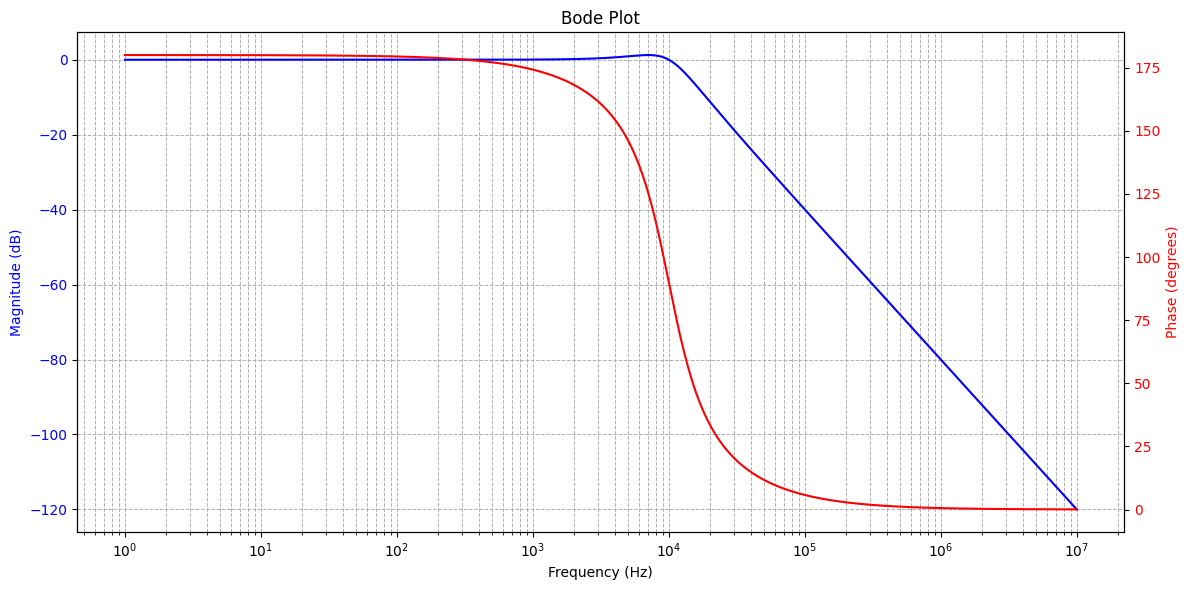

In [4]:
k_expr = -R3 / R1
w0_expr = 1 / (R3 * C)
Q_expr = R2 / R3

values = {k: k_expr, Q: Q_expr, w0: w0_expr}

f0 = 10e3
_w0 = 2 * np.pi * f0

T = T.subs(values)

values = {C: 1 / (_w0 * 1), R1: 1, R2: 1, R3: 1}

(magnitude_db, frequencies, _) = uplt.plot_tf(T, values)

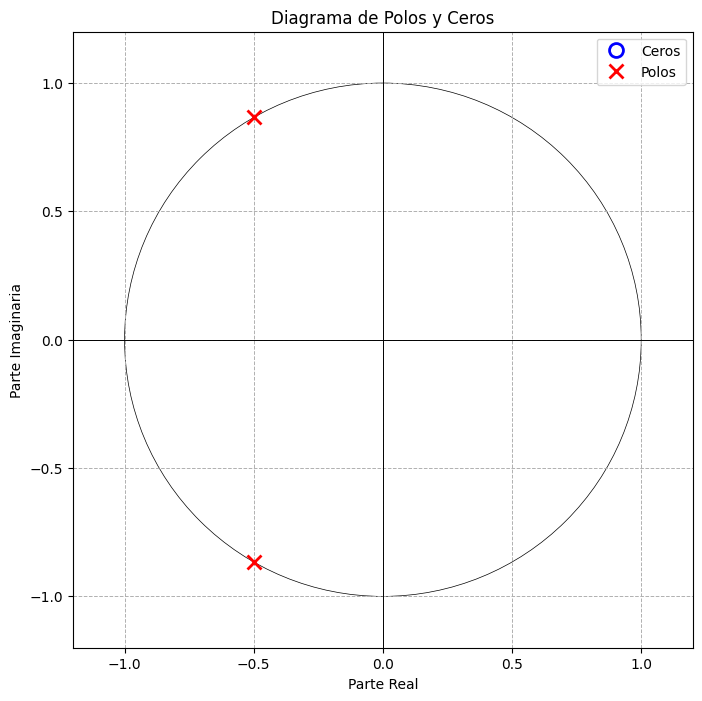

In [5]:
# Se utiliza omega_0 unitario
# para visualizar mejor el diagrama de polos y ceros
# de forma cualitativa.
_w0 = 1
values = {C: 1 / (_w0 * 1), R1: 1, R2: 1, R3: 1}

_ = uplt.plot_polos_ceros(T, _w0, values)

## Caracterización del Filtro

<div align=center>

| Característica      | Descripción                                                                                           |
| ------------------- | ----------------------------------------------------------------------------------------------------- |
| Tipo de filtro      | Pasabajo activo de segundo orden                                                                      |
| Ganancia banda paso | Aproximadamente \|k\| (inversión de fase por signo negativo)                                          |
| Frecuencia de corte | $\omega_0$                                                                                            |
| Roll-off            | -40 dB/década típico de filtro de segundo orden                                                       |
| Polos               | Dos polos en s determinados por $\omega_0$ y $Q$, afectan estabilidad y resonancia                    |
| Ceros               | Ninguno finito (solo cero en infinito)                                                                |
| Fase                | Inicia en $180^{\circ}$ (por el signo negativo de k), decrece con frecuencia, afecta retardo de grupo |
| Retardo de grupo    | Pico cerca de $\omega_0$, puede causar distorsión de fase en señales de banda ancha                   |

</div>


## Sensibilidad

### Para $Q$

$Q =  \frac{R_2}{R_3} = R_2 \, R_3^{-1}$

- $S^Q_{R_2} = 1$ &rarr; significa que es proporcional

- $S^Q_{R_3} = -1$ &rarr; significa que es inversamente proporcional

$$
\cfrac{\Delta Q}{Q} = S^Q_{R_2}  \frac{\Delta R_2}{R_2} + S^Q_{R_3} \frac{\Delta R_3}{R_3} = \frac{\Delta R_2}{R_2} - \frac{\Delta R_3}{R_3}
$$

### Para $\omega_0$

$\omega_0 =  \frac{1}{R_3 \, C} = R_3^{-1} \, C^{-1}$

- $S^{\omega_0}_C = -1$ &rarr; significa que es inversamente proporcional
- $S^{\omega_0}_{R_3} = -1$ &rarr; significa que es inversamente proporcional

$$
\cfrac{\Delta \omega_0}{\omega_0} = - \frac{\Delta R_3}{R_3} - \frac{\Delta C}{C}
$$

### Para $k$

$k =  \frac{R_3}{R_1} = R_3^{1} \, R_1^{-1}$

- $S^{k}_{R_1} = -1$ &rarr; significa que es inversamente proporcional
- $S^{k}_{R_3} = 1$ &rarr; significa que es proporcional

$$
\cfrac{\Delta k}{k} = \frac{\Delta R_3}{R_3} - \frac{\Delta R_1}{R_1}
$$

### Simualación con LT Spice - Montecarlo

Para simular las tolerancias de los componentes, se utiliza la directiva `mc` (que realiza un análisis de montecarlo), pero con un componente a la vez para verificar el resultado analítico.

Se utiliza lo explicado en el blog de Analog Devices: [How to Model Statistical Tolerance Analysis for Complex Circuits Using LTspice | Analog Devices](https://www.analog.com/en/resources/technical-articles/how-to-model-statistical-tolerance-analysis.html).

El procedimiento para calcular graficamente la sensibilidad del componente se detalla a continuación:

- Para $k$: $R_3$ sin incertidumbre, ya que afectaría otras variables, y se le aplica una incertidumbre a $R_1$. Luego en el gráfico de Magnitud cerca de $omega = 0$ se calcula el $\Delta k$, se observa la mayor y menor curva graficada, la diferencia es $2 \, \Delta k$.
- Para $\omega_0$: $R_3$ sin incertidumbre, ya que afectaría otras variables, y se le aplica una incertidumbre a $C$. Luego en el gráfico de Fase centrado en $\frac{\pi}{2}$ se calcula el $\Delta \omega_0$, se observa la mayor y menor curva graficada, la diferencia es $2 \, \Delta \omega_0$.
- Para $Q$: $R_3$ sin incertidumbre, ya que afectaría otras variables, y se le aplica una incertidumbre a $R_2$. Luego en el gráfico de Magnitud centrado en $\omega_0$ se calcula el $\Delta Q$, se observa la mayor y menor curva graficada, la diferencia es $2 \, \Delta Q$.

Se toma como referencia la sensibilidad de $omega_0$. El cálculo de las demás variables es similar y ya fue detallado.
Se tiene un $C$ con una tolerancia de $\pm 5 \%$

Para verificar la ecuación:

$$
\cfrac{\Delta \omega_0}{\omega_0} = - \frac{\Delta R_3}{R_3} - \frac{\Delta C}{C}
$$

$R_3$ no tiene incertidumbre:

$$
\frac{\Delta R_3}{R_3} = 0 \quad \wedge \quad  \frac{\Delta C}{C} = 5\%
$$

Por lo tanto:

$$
\cfrac{\Delta \omega_0}{\omega_0} = S^{\omega_0}_C \frac{\Delta C}{C} = S^{\omega_0}_C \, 5\%
$$

Con valores:

- $\Delta \omega_0 = 500 Hz$
- $\omega_0 = 10 kHz$

$$
\cfrac{500}{10k} \, \frac{100}{5} = | S^{\omega_0}_C | = 1
$$

El signo menos no se aprecia facilmente al utilizar la directiva `mc`, si se grafica con cambios en el capacitor usando la directiva `.step param`, se observa que cuando el capacitor crece, $omega_0$ decrece, de este comportamiento se obtiene el signo negativo.

Circuito:

<div align=center>

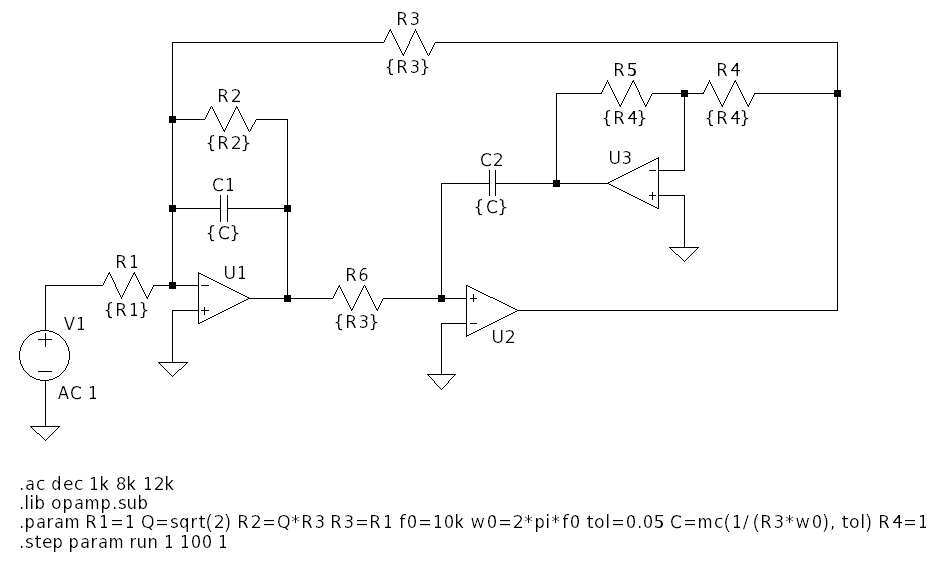

</div>

Sensibilidad de $\omega_0$ observando la fase:

<div align=center>

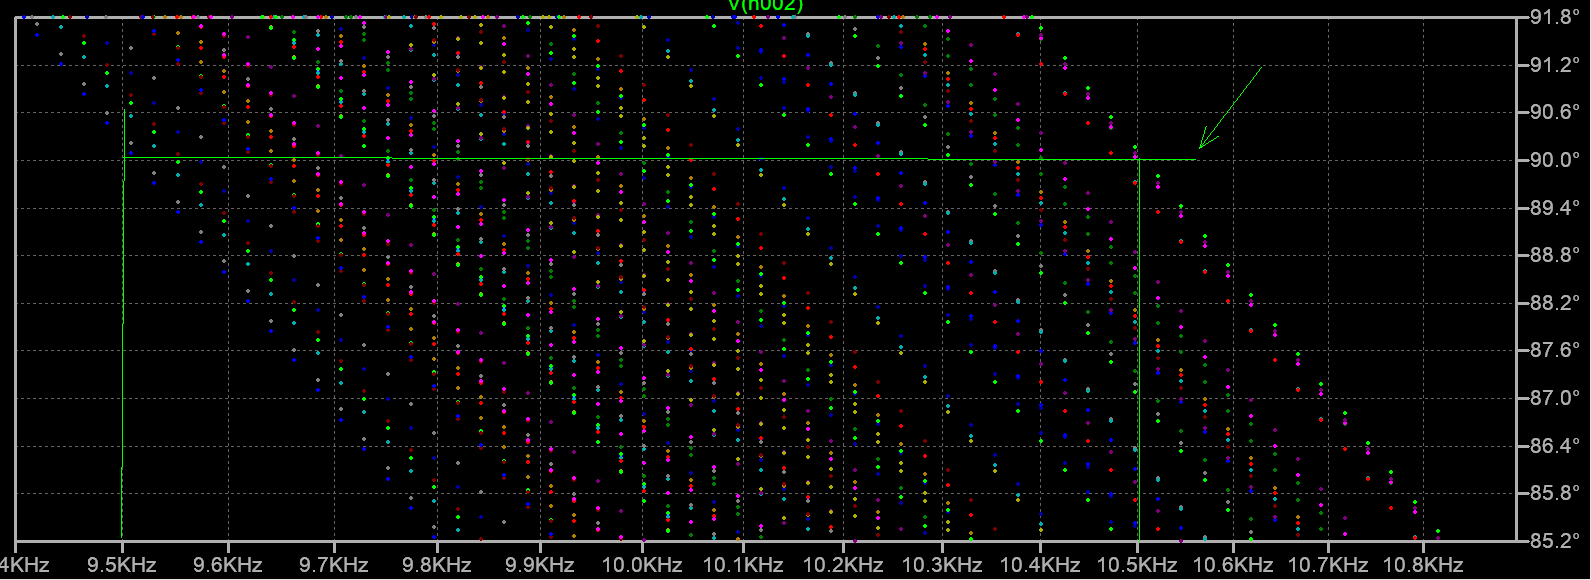

</div>

La flecha indica el aumento de la capacidad, se aprecia que cuando aumenta, decrece $\omega_0$, la cual "corta" con $\frac{\pi}{2}$:

<div align=center>

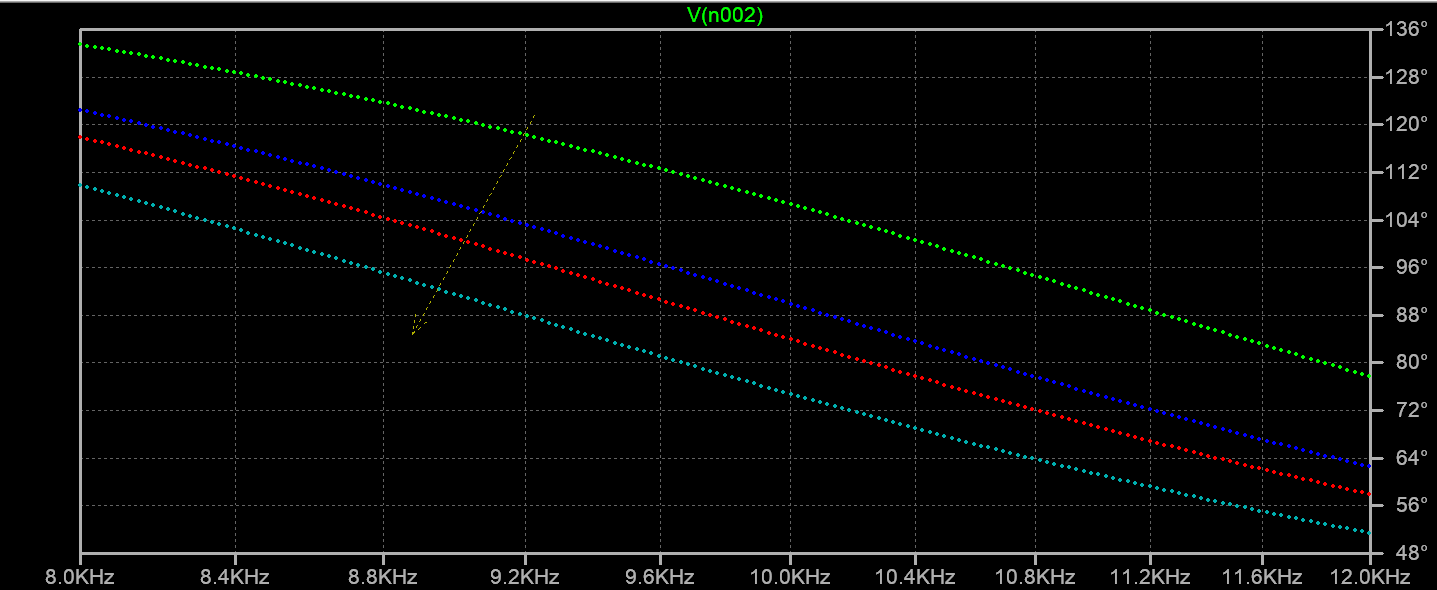

</div>

Se utilizó la siguiente directiva:

```
.step param Cp list 1.43e-5 1.59e-5 1.65e-5 1.75e-5
```

`1.59e-5` produce la frecuencia de $\omega_0 = 10 kHz$, se utilizan 2 capacidades mayores y 1 menor para distinguirlas en el gráfico.


<a href="./TS3.asc" download="TS3.asc">Descargar TS3.asc</a>

## Butterworth

Para obtener un filtro butterworth, es tan sencillo como observar la transferencia normalizada:

$$
H(s) = - R_3 \;  \cfrac{1}{s^2 + s \, \frac{1}{R_2} + 1}
$$

Se interpreta que $R_3 = 1$ y $R_2 == 1/Q = \sqrt{2}$ para lograr obtener un pasa-bajos tipo Butterworth.

Circuito:

<div align=center>

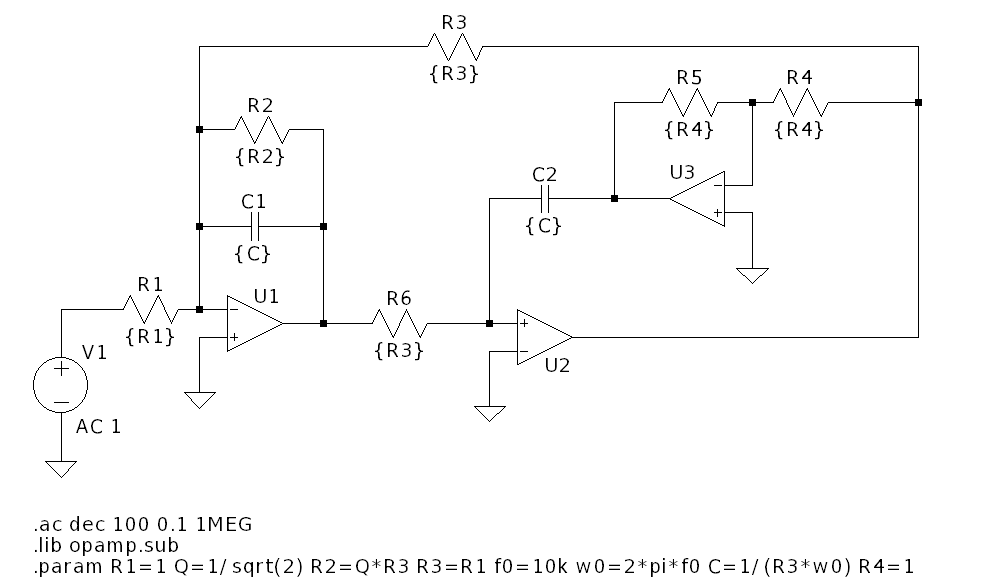

</div>

Magnitud y Fase:

<div align=center>

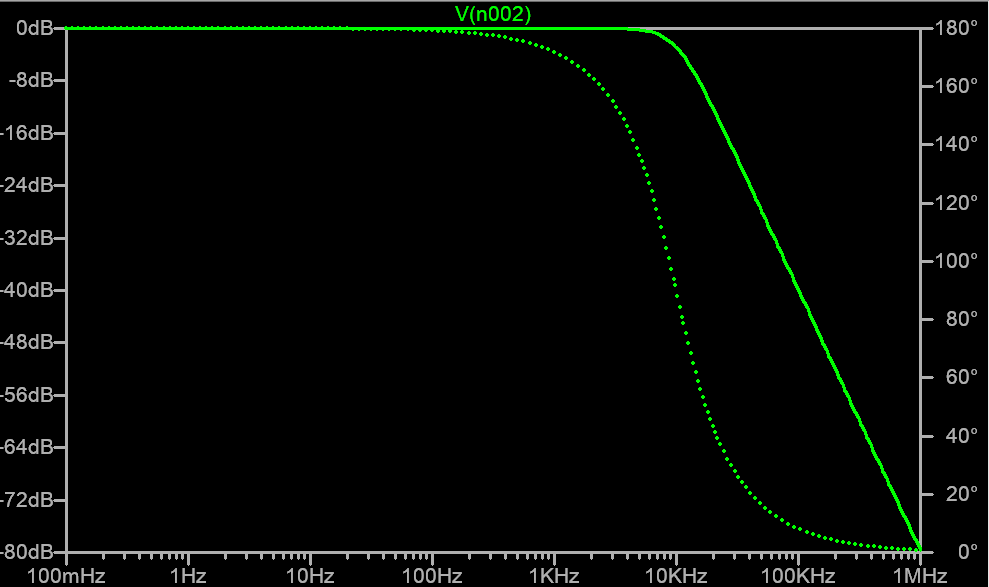

</div>


<a href="./TS3_butter.asc" download="TS3_butter.asc">Descargar TS3_butter.asc</a>

## Ackerberg-Mossberg

A partir de la explicación del Schaumann, R. - Van Valkenburg, Mac E., _Design of Analog Filters_, Capítulo 4: Second-Order Lowpass and Bandpass Filters. Sección 4.4: Integrators: The Effect of $A(s)$. Example 4.6. Página 159.

Si $V_{\text{out}}$ es $V_{\text{U}_1}$ en vez de la salida que estuvimos considerando, se tiene un filtro pasabanda. Se realiza la simulación con LTSpice.

Circuito:

<div align=center>

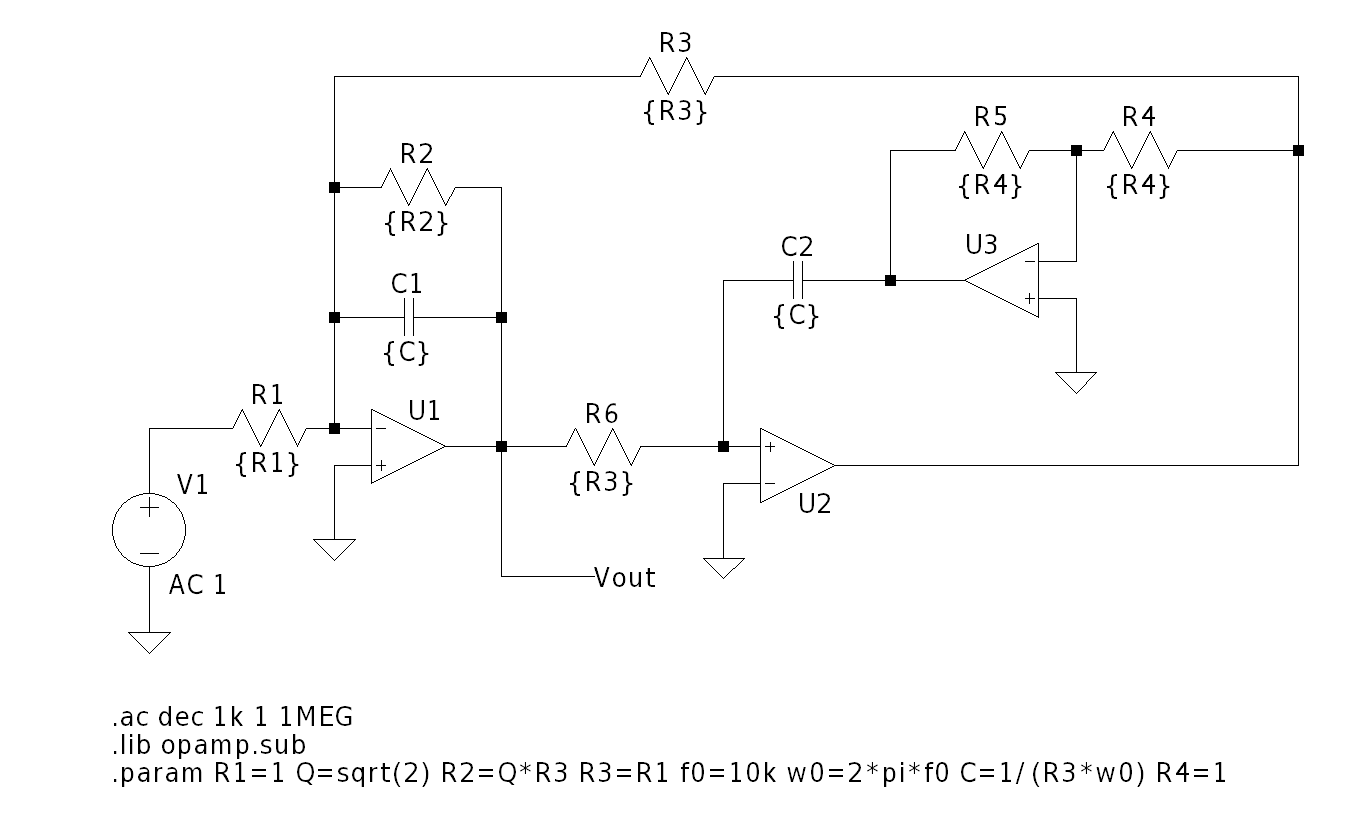

</div>

Magnitud y Fase:

<div align=center>

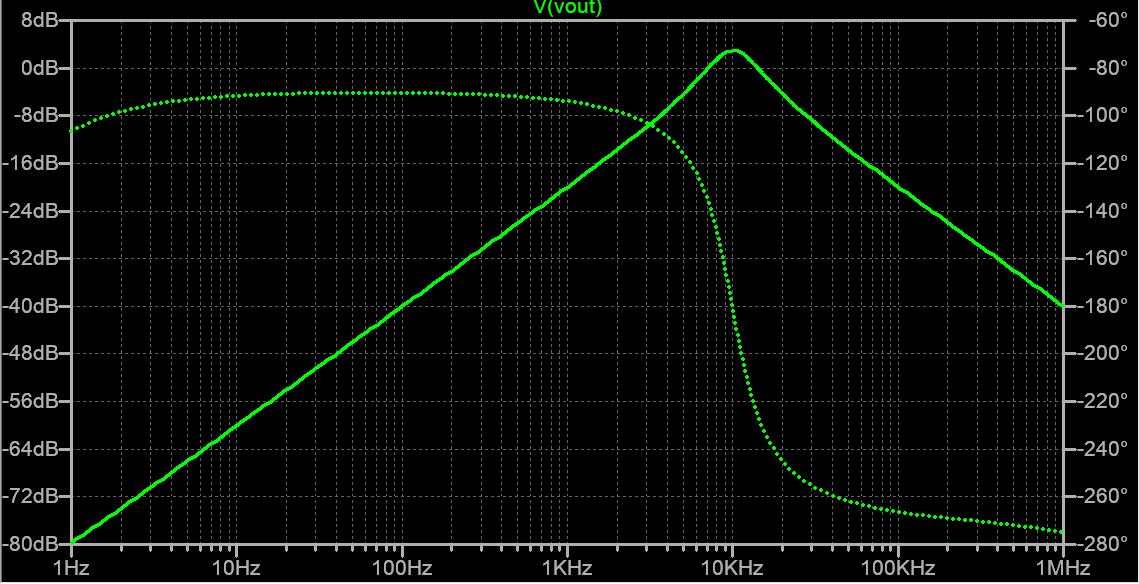

</div>
